<a href="https://colab.research.google.com/github/jadisiii/DS-Unit-1-Sprint-2-Statistics/blob/master/Ray_Arbizu_LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [77]:
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat_01.csv to student-mat_01.csv


In [3]:
students = pd.read_csv('/content/student-mat_01.csv')

In [94]:
students.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_groups
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,middle
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,middle


In [79]:
# Your work here
xtab01 = pd.crosstab(students['sex'], students['famsup'])

xtab01

famsup,no,yes
sex,,
F,66,142
M,87,100


In [80]:
stats.chi2_contingency(xtab01)

(8.468139323243804,
 0.0036142094281472197,
 1,
 array([[ 80.56708861, 127.43291139],
        [ 72.43291139, 114.56708861]]))

In [91]:
# Pulling out values of interest --- Prximity to 0 is the key
print('Chi SQ Stat = ', stats.chi2_contingency(xtab01)[0])
print('')
print('P-Value = ', stats.chi2_contingency(xtab01)[1]) # p-value
print('')
print("DDOF (Delta Degrees of Freedom) = ", stats.chi2_contingency(xtab01)[2]) # ddof
print('')
print('Expected (Null Hypothesis) = ', stats.chi2_contingency(xtab01)[3]) # expected = null hypo

Chi SQ Stat =  8.468139323243804

P-Value =  0.0036142094281472197

DDOF (Delta Degrees of Freedom) =  1

Expected (Null Hypothesis) =  [[ 80.56708861 127.43291139]
 [ 72.43291139 114.56708861]]


### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [41]:
# Looking at just numerical data
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [42]:
# Looking at non-numeric columns 
students.describe(exclude='number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [43]:
# Creating some binned categories
students['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [50]:
cut_points=[0,16, 18, 1000]
students['age_groups']=pd.cut(students['age'], cut_points,labels=['youngest', 'middle', 'oldest'])
students['age_groups'].value_counts()

youngest    186
middle      180
oldest       29
Name: age_groups, dtype: int64

In [51]:
# Sex
students['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [54]:
# Creating a Crosstab
pd.crosstab(students['sex'], students['age_groups'], normalize='index')

age_groups,youngest,middle,oldest
sex,,,
F,0.442308,0.485577,0.072115
M,0.502674,0.422460,0.074866


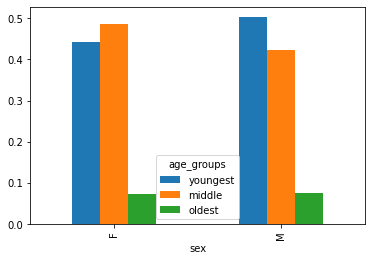

In [56]:
pd.crosstab(students['sex'], students['age_groups'], normalize='index').plot(kind='bar');

In [57]:
xsag = pd.crosstab(students['sex'], students['age_groups'], margins=True)
xsag

age_groups,youngest,middle,oldest,All
sex,,,,
F,92,101,15,208
M,94,79,14,187
All,186,180,29,395


In [59]:
# Creating female counts
f_counts = xsag.iloc[0][0:6].values
f_counts

array([ 92, 101,  15, 208])

In [60]:
# Creating mail counts
m_counts = xsag.iloc[1][0:6].values
m_counts

array([ 94,  79,  14, 187])

In [64]:
# Expected Value Calculation 
row_sums = xsag.iloc[0:2, 3].values
col_sums = xsag.iloc[2, 0:3].values

In [67]:
# Total
total = xsag.loc['All', 'All']
total

395

In [68]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[97.9443038  94.78481013 15.27088608]
 [88.0556962  85.21518987 13.72911392]]


In [70]:
observed = pd.crosstab(students['sex'], students['age_groups']).values
print(observed.shape)
observed

(2, 3)


array([[ 92, 101,  15],
       [ 94,  79,  14]])

In [71]:
xsag = pd.crosstab(students['sex'], students['age_groups'])
xsag

age_groups,youngest,middle,oldest
sex,,,
F,92,101,15
M,94,79,14


In [72]:
# Chis Square Test
stats.chi2_contingency(xsag)

(1.6330370580957434,
 0.4419676767745506,
 2,
 array([[97.9443038 , 94.78481013, 15.27088608],
        [88.0556962 , 85.21518987, 13.72911392]]))

In [92]:
# Pulling out values of interest --- Prximity to 0 is the key
print('Chi SQ Stat = ', stats.chi2_contingency(xsag)[0])
print('')
print('P-Value = ', stats.chi2_contingency(xsag)[1]) # p-value
print('')
print("DDOF (Delta Degrees of Freedom) = ", stats.chi2_contingency(xsag)[2]) # ddof
print('')
print('Expected (Null Hypothesis) = ', stats.chi2_contingency(xsag)[3]) # expected = null hypo

Chi SQ Stat =  1.6330370580957434

P-Value =  0.4419676767745506

DDOF (Delta Degrees of Freedom) =  2

Expected (Null Hypothesis) =  [[97.9443038  94.78481013 15.27088608]
 [88.0556962  85.21518987 13.72911392]]


## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [95]:
# Printing the numerical and non-numerical data in df to make a crosstab for comparisson 
df = pd.read_csv('/content/student-mat_01.csv')

def xtcomp():
  print('Here are your numerical columns')
  print(df.describe())
  print('')
  print('Here are your categorical columns')
  print(df.describe(exclude='number'))
  print('')
  print('Chose one numerical column and one categorical column.')

In [98]:
# Testing this function 
xtcomp()

Here are your numerical columns
              age        Medu        Fedu  ...          G1          G2          G3
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519  ...   10.908861   10.713924   10.415190
std      1.276043    1.094735    1.088201  ...    3.319195    3.761505    4.581443
min     15.000000    0.000000    0.000000  ...    3.000000    0.000000    0.000000
25%     16.000000    2.000000    2.000000  ...    8.000000    9.000000    8.000000
50%     17.000000    3.000000    2.000000  ...   11.000000   11.000000   11.000000
75%     18.000000    4.000000    3.000000  ...   13.000000   13.000000   14.000000
max     22.000000    4.000000    4.000000  ...   19.000000   19.000000   20.000000

[8 rows x 16 columns]

Here are your categorical columns
       school  sex address famsize  ... nursery higher internet romantic
count     395  395     395     395  ...     395    395      395      395
unique      2    

In [99]:
# Choose one numerical column and one categorical column

def chi2_info(cat_col, num_col):
  xtab = pd.crosstab(df[cat_col], df[num_col])
  print('Chi SQ Stat = ', stats.chi2_contingency(xtab)[0])
  print('')
  print('P-Value = ', stats.chi2_contingency(xtab)[1]) 
  print('')
  print("DDOF (Delta Degrees of Freedom) = ", stats.chi2_contingency(xtab)[2]) 
  print('')
  print('Expected (Null Hypothesis) = ', stats.chi2_contingency(xtab)[3]) 


In [100]:
# Use the function to display the Chi2 information and break down
# chi2_info(cat_col, num_col)

chi2_info('romantic', 'age')

Chi SQ Stat =  13.990476733971374

P-Value =  0.05135099339722311

DDOF (Delta Degrees of Freedom) =  7

Expected (Null Hypothesis) =  [[54.59746835 69.24556962 65.25063291 54.59746835 15.97974684  1.99746835
   0.66582278  0.66582278]
 [27.40253165 34.75443038 32.74936709 27.40253165  8.02025316  1.00253165
   0.33417722  0.33417722]]




### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics? 
 > The sample estimate is an inference('s) made of a population based on the sample data that is given.

- What are hypothesis test? How are they useful?
> A hypothesis test is a statistical analysis test used to asses the plausibility of a hypothesis based on the sample data. 

- What is a "null hypothesis?"
> A null hypothesis may state that the population mean return is equal to zero.

- What is a p-value and what does it represent?
> The P-Value is used to determine if there is enough evidence to reject the null hypothesis

- What does it mean for something to be "statistically significant?"
> The farther away from 0.0 the P-value is the more it statistically significant

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)